In [1]:
# Importing modules
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import math

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/rajan/miniconda3/envs/ml/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


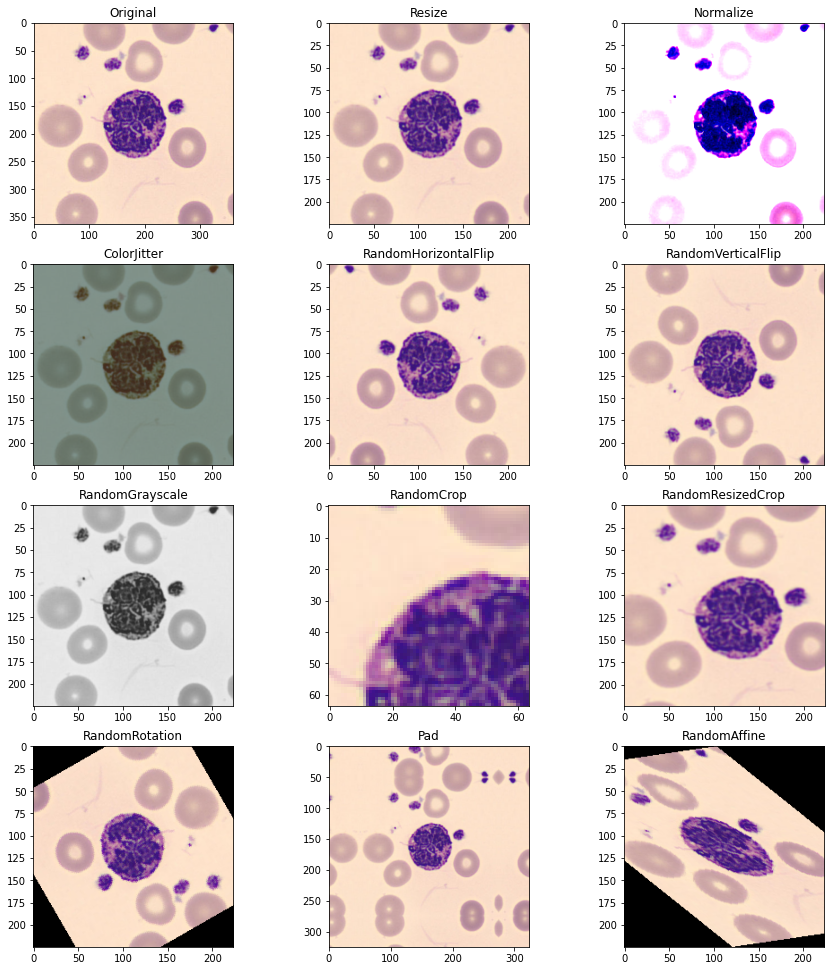

In [2]:
# Data dir
data_dir = "./train"

# Transformation components
resize = transforms.Resize(224)
toTensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
colorJitter = transforms.ColorJitter(brightness=(0.5, 1), contrast=(0.5, 1), saturation=(0.5, 1), hue=(-0.5, 0.5))
horFlip = transforms.RandomHorizontalFlip(p=1) # p=1 means probablity of flip is 100%
verFlip = transforms.RandomVerticalFlip(p=1)
grayScale = transforms.RandomGrayscale(p=1)
randCrop = transforms.RandomCrop(size=64)
randResizeCrop = transforms.RandomResizedCrop(size=224, ratio=(0.5,1))
randRotation = transforms.RandomRotation(degrees=180)
pad = transforms.Pad(padding=50, padding_mode="reflect")
randAffine = transforms.RandomAffine(degrees=10, shear=50)

# Transformation pipeline
transform = {"Original": transforms.Compose([toTensor]),
             "Resize": transforms.Compose([resize, toTensor]),
             "Normalize": transforms.Compose([resize, toTensor, normalize]),
             "ColorJitter": transforms.Compose([resize, toTensor, colorJitter]),
             "RandomHorizontalFlip": transforms.Compose([resize, toTensor, horFlip]),
             "RandomVerticalFlip": transforms.Compose([resize, toTensor, verFlip]),
             "RandomGrayscale": transforms.Compose([resize, toTensor, grayScale]),
             "RandomCrop": transforms.Compose([resize, toTensor, randCrop]),
             "RandomResizedCrop": transforms.Compose([resize, toTensor, randResizeCrop]),
             "RandomRotation": transforms.Compose([resize, toTensor, randRotation]),
             "Pad": transforms.Compose([resize, toTensor, pad]),
             "RandomAffine": transforms.Compose([resize, toTensor, randAffine])}

# Function: Running all transformation
def run_transformation():
    n_rows, n_cols = 4, 3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 17))
    for ax, i in zip(axes.flatten(), transform.keys()):
        dataset = datasets.ImageFolder(data_dir, transform[i])
        ax.imshow((dataset[1][0]).permute(1, 2, 0))
        ax.set_title(i)
    plt.show()
    

run_transformation()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


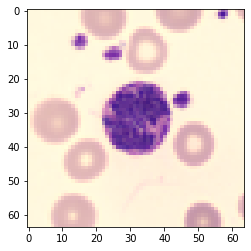

In [3]:
# Function for adding noise to the tensor | Custom Transformation
def random_noise(x):
    mean = 0
    std = 0.01
    noise = (math.sqrt(std)*x)+mean
    return x.add(noise)

# Wrapping random_noise function using lambda
RandomNoise = transforms.Lambda(lambda x: random_noise(x))

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.RandomApply([RandomNoise], p=1)])

# Dataset
dataset = datasets.ImageFolder(data_dir, transform)

# Plotting 
plt.imshow((dataset[1][0]).permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


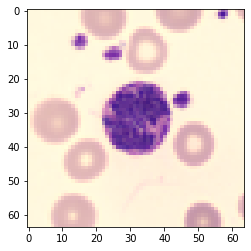

In [4]:
# Class for adding noise to the tensor | Custom Transformation
class RandomNoise:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
    def __call__(self, x):
        noise = (x*math.sqrt(self.std))+self.mean
        return x.add(noise)
    
# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.RandomApply([RandomNoise(0, 0.01)], p=1)])

# Dataset
dataset = datasets.ImageFolder(data_dir, transform)

# Plotting 
plt.imshow((dataset[1][0]).permute(1, 2, 0))
plt.show()